<a href="https://colab.research.google.com/github/kylekce/algorithms-and-data-structures/blob/main/Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

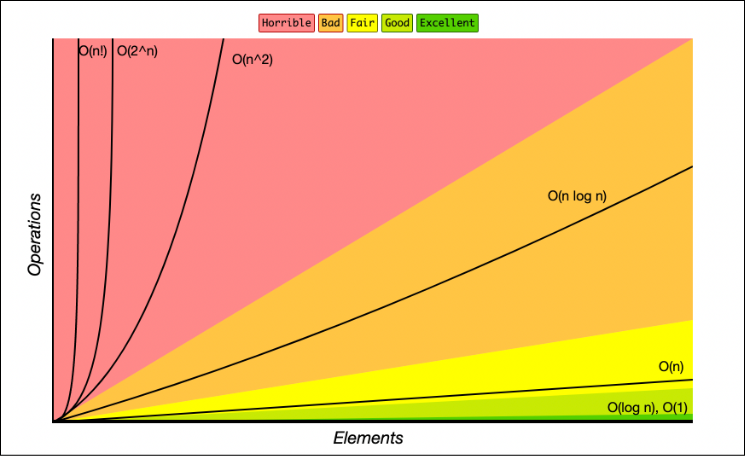

# Sort Algorithms


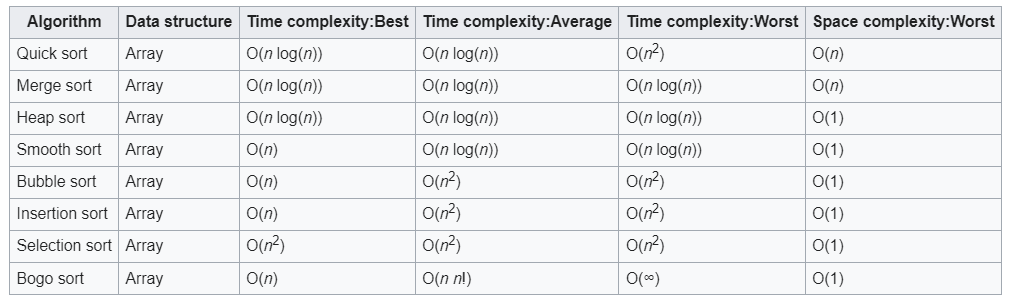

## Bubble Sort

Time Complexity: O(n²)

In [ ]:
def bubble(unsorted_list):
  # We do this because list is a zero-based indexing.
  # Plus, we only want to loop until you reach the second-to-the-last element.
  # That's because the last element doesn't have a next element to compare it to.
  list_length = len(unsorted_list) - 1
  is_sorted = False

  while not is_sorted:
    is_sorted = True

    for i in range(list_length):
      if unsorted_list[i] >  unsorted_list[i + 1]:
        is_sorted = False
        unsorted_list[i], unsorted_list[i + 1] = unsorted_list[i + 1], unsorted_list[i]

  return unsorted_list

print(bubble([5, 3, 7, 1]))

[1, 3, 5, 7]


## Selection Sort

Time Complexity: O(n²)

In [ ]:
def selection(unsorted_list):
  list_length = len(unsorted_list)

  for i in range(list_length - 1):
    min_index = i

    for j in range(i + 1, list_length):
      if unsorted_list[j] < unsorted_list[min_index]:
        min_index = j

    if min_index != i:
      unsorted_list[i], unsorted_list[min_index] = unsorted_list[min_index], unsorted_list[i]

  return unsorted_list

print(selection([3, 4, 5, 1, 2, 6, 5]))

[1, 2, 3, 4, 5, 5, 6]


## Insertion Sort

Time Complexity: O(n²)

In [ ]:
def insertion(unsorted_list):
  list_length = len(unsorted_list)

  # Since the first index will be on the sorted sublist,
  # It doesn't need to be included on the first iteration of the loop
  for i in range(1, len(unsorted_list)):
    while unsorted_list[i - 1] > unsorted_list[i] and i > 0:
      unsorted_list[i - 1], unsorted_list[i] = unsorted_list[i], unsorted_list[i - 1]

      i -= 1

  return unsorted_list

print(insertion([5, 6, 7, 9, 5, 3, 1, 7]))

[1, 3, 5, 5, 6, 7, 7, 9]


## Quick Sort

Time Complexity: O(n²)

In [ ]:
def quick(unsorted_list):
  if len(unsorted_list) <= 1:
    return unsorted_list

  greater_sublist = []
  lower_sublist = []
  pivot = unsorted_list.pop()

  for element in unsorted_list:
    if element > pivot:
      greater_sublist.append(element)
    else:
      lower_sublist.append(element)

  return quick(lower_sublist) + [pivot] + quick(greater_sublist)

print(quick([5, 4, 3, 2, 8, 1, 7, 9]))

[1, 2, 3, 4, 5, 7, 8, 9]


## Merge Sort

Time Complexity: O(n log n)

In [ ]:
def merge(unsorted_list):
  list_length = len(unsorted_list)

  if list_length > 1:
    left_sublist = unsorted_list[:list_length // 2]
    right_sublist = unsorted_list[list_length // 2:]

    merge(left_sublist)
    merge(right_sublist)

    # Compare the left list to the right list and merge it back to the unsorted list
    left_index = 0
    right_index = 0
    merged_array_index = 0

    while left_index < len(left_sublist) and right_index < len(right_sublist):
      if left_sublist[left_index] < right_sublist[right_index]:
        unsorted_list[merged_array_index] = left_sublist[left_index]
        left_index += 1
      else:
         unsorted_list[merged_array_index] = right_sublist[right_index]
         right_index += 1

      merged_array_index += 1


    while left_index < len(left_sublist):
      unsorted_list[merged_array_index] = left_sublist[left_index]
      left_index += 1
      merged_array_index += 1

    while right_index < len(right_sublist):
      unsorted_list[merged_array_index] = right_sublist[right_index]
      right_index += 1
      merged_array_index += 1

  return unsorted_list

print(merge([5, 4, 3, 2, 8, 1, 7, 9]))

[1, 2, 3, 4, 5, 7, 8, 9]


# Search Algorithms


## Linear Search

In [ ]:
def linear(_list, target):
  return target in _list

print(linear([1, 3, 4, 9, 10], 9))

True


In [ ]:
def linear(_list, target):
  for element in _list:
    if element == target: return True

  return False

print(linear([1, 3, 4, 9, 10], 11))

False


## Binary Search

In [ ]:
def binary(_list, target):
  start_index = 0
  end_index = len(_list) - 1

  while start_index <= end_index:
    mid_index = start_index + (end_index - start_index) // 2
    mid_value = _list[mid_index]

    if mid_value == target:
      return True
    elif mid_value > target:
      end_index = mid_index - 1
    else:
      start_index = mid_index + 1

  return False

print(binary([1, 2, 3, 5], 5))

True


## Depth-First Search

In [ ]:
class Graph:
    def __init__(self):
        self.graph = {}  # Initialize an empty dictionary to represent the graph

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []  # If the vertex is not already in the graph, add it with an empty list of neighbors
        self.graph[u].append(v)  # Add the edge from u to v

    def dfs(self, start, visited=None):
        if visited is None:
            visited = set()  # Initialize an empty set to keep track of visited vertices
        visited.add(start)  # Mark the current vertex as visited
        print(start, end=" ")  # Print the current vertex

        for neighbor in self.graph.get(start, []):  # Iterate over neighbors of the current vertex
            if neighbor not in visited:  # If the neighbor hasn't been visited yet
                self.dfs(neighbor, visited)  # Recursively call dfs on the neighbor

# Example usage:
g = Graph()
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 2)
g.add_edge(2, 0)
g.add_edge(2, 3)
g.add_edge(3, 3)

g.dfs(2)  # Start DFS from vertex 2


2 0 1 3 

## Breadth-First Search

In [ ]:
from collections import deque

class Graph:
    def __init__(self):
        self.graph = {}  # Initialize an empty dictionary to represent the graph

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []  # If the vertex is not already in the graph, add it with an empty list of neighbors
        self.graph[u].append(v)  # Add the edge from u to v

    def bfs(self, start):
        visited = set()  # Initialize an empty set to keep track of visited vertices
        queue = deque([start])  # Initialize a deque with the starting vertex

        while queue:  # Continue BFS until the queue is empty
            vertex = queue.popleft()  # Dequeue a vertex from the queue
            if vertex not in visited:  # If the vertex hasn't been visited yet
                print(vertex, end=" ")  # Print the vertex
                visited.add(vertex)  # Mark the vertex as visited
                neighbors = self.graph.get(vertex, [])  # Get the neighbors of the current vertex
                for neighbor in neighbors:  # Iterate over each neighbor
                    if neighbor not in visited:  # If the neighbor hasn't been visited yet
                        queue.append(neighbor)  # Enqueue the neighbor for further exploration

# Example usage:
g = Graph()
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 2)
g.add_edge(2, 0)
g.add_edge(2, 3)
g.add_edge(3, 3)

g.bfs(2)  # Start BFS from vertex 2


2 0 3 1 